In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp
# Beta 函数
def Beta(a, b, x):
    value = (x**(a-1)) * ((1-x)**(b-1))
    return value

# 计算黎曼和
def reimann_sum(f, a, b, N=10000):
    total_sum = 0
    for i in range(1, N+1):
        # 调用 Beta 函数时传入 a, b 和 x
        total_sum += Beta(3, 3, a + (b - a) / N * i)
    return (b - a) / N * total_sum

# 计算黎曼和
riemann_result = reimann_sum(Beta, 0, 1, N=10000)
error = 0.033333333333333326 - riemann_result
print(f"黎曼和的计算结果：{riemann_result}")
print(f"黎曼和的误差：{error}")


黎曼和的计算结果：0.03333333333333341
黎曼和的误差：-8.326672684688674e-17


In [28]:
class Pdf:
    def __call__(self,x):
        pass
    def sample(self, n):
        pass

class Beta(Pdf):
    def __init__(self, a=3, b=3):
        self.a = a
        self.b = b
    def __call__(self, x):
        return 2*np.log(x) + 2*np.log(1-x)

class Uniform(Pdf):
    def __init__(self, low, high):
        self.low = low
        self.high = high
    def __call__(self, x):
        return np.repeat(-np.log(self.high - self.low), len(x))
    def sample(self, n):
        return np.random.uniform(self.low, self.high, n)

In [30]:
class ImportanceSampler:
    def __init__(self, p_dist, q_dist):
        self.p_dist = p_dist
        self.q_dist = q_dist
    def sample(self, n):
        samples = self.q_dist.sample(n)
        weights = self.calc_weights(samples)
        norm_weights = weights - logsumexp(weights)
        return samples, norm_weights
    def calc_weights(self, samples):
        return self.p_dist(samples) - self.q_dist(samples)

In [32]:
N = 200000
target_p = Beta()
imp_q = Uniform(0, 1)
sampler = ImportanceSampler(target_p, imp_q)
biased_samples, logws = sampler.sample(N)

In [36]:
samples = np.random.choice(biased_samples, N, p=np.exp(logws))

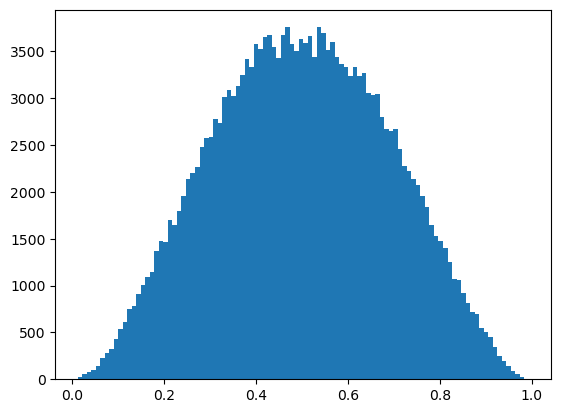

In [45]:
_ = plt.hist(samples, bins=100)